# <center>An Analysis Estimating Racial Disparities When Race Is Not Observed

This notebook's purpose is to demonstrate how disconsidering race from applications removes the delicate balance of diversity and merit of accepted applicants. Recently, my prestigious alma mater Lowell High School (San Francisco) briefly experimented with a lottery based admission system for the 2021-22 and 2022-23 school years ["citing COVID-related barriers to grades and test scores, as well as diversity concerns."<sup>(1)](https://reason.com/2022/10/12/a-top-ranked-high-school-got-rid-of-merit-based-admissions-then-students-grades-tanked/)
However, with [almost three times as many freshman failing<sup>(2)](https://www.sfchronicle.com/sf/article/lowell-high-admissions-17196603.php#:~:text=Of%20the%20620%20students%20in,figures%20obtained%20by%20The%20Chronicle.)
as previous years, they quickly decided to switch back to merit based admissions to maintain their reputation. 
    
Now that the US Supreme Court banned considering race in applications across universities, let's look at how different color-blind admission systems affect diversity and each applicants ability to succeed at that level. 


# 1. A Look at Students as a Whole

Source for data below:
https://www.usnews.com/education/best-high-schools/california/districts/san-francisco-unified-school-district/lowell-high-school-3259

In [1]:
# 2021-2022 Total Enrollment per grade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
seed = 42
enroll = {'Grade Level': [9, 10, 11, 12, 'Total Enrollment'],
          'Students': [649, 699, 719, 719, 2786]}
enrollment = pd.DataFrame.from_dict(enroll)
enrollment

,Grade Level,Students
0,9,649
1,10,699
2,11,719
3,12,719
4,Total Enrollment,2786


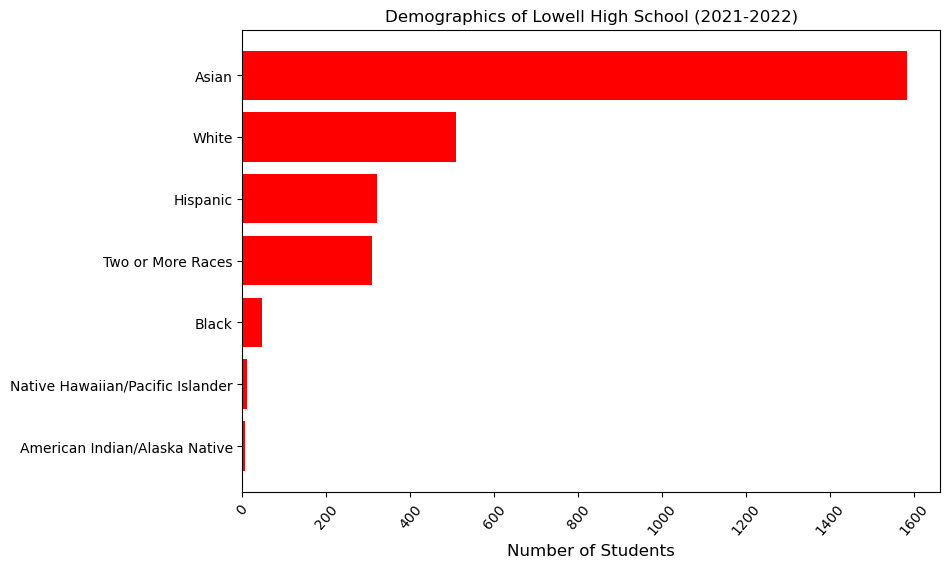

,Group,Percent,Students
0,Minority Enrollment,81.7,2276.0
1,Asian,56.8,1582.0
2,White,18.3,510.0
3,Hispanic,11.5,320.0
4,Two or More Races,11.1,309.0
5,Black,1.7,47.0
6,Native Hawaiian/Pacific Islander,0.4,11.0
7,American Indian/Alaska Native,0.2,6.0


In [2]:
# 2021-2022 Enrollment by Race
num_enroll = 2786
race = [(81.7, 'Minority Enrollment'), (18.3, 'White'),
        (56.8, 'Asian'), (11.5, 'Hispanic'),
        (11.1, 'Two or More Races'), (1.7, 'Black'),
        (0.4, 'Native Hawaiian/Pacific Islander'), (0.2, 'American Indian/Alaska Native')]
races = pd.DataFrame.from_records(race)
races['Students'] = round(races[0]/100*num_enroll)
races.columns = ['Percent', 'Group', 'Students']
races = races[races.columns[[1, 0, 2]]]
races.sort_values('Students', ascending=True, inplace=True, ignore_index=True)
plt.figure(figsize=(9, 6))
plt.title('Demographics of Lowell High School (2021-2022)')
plt.barh(races['Group'].iloc[:-1], races['Students'].iloc[:-1], color='Red')
plt.xticks(rotation=50)
plt.xlabel('Number of Students', size=12)
plt.show()
(races.sort_values('Students',ascending=False, ignore_index=True))

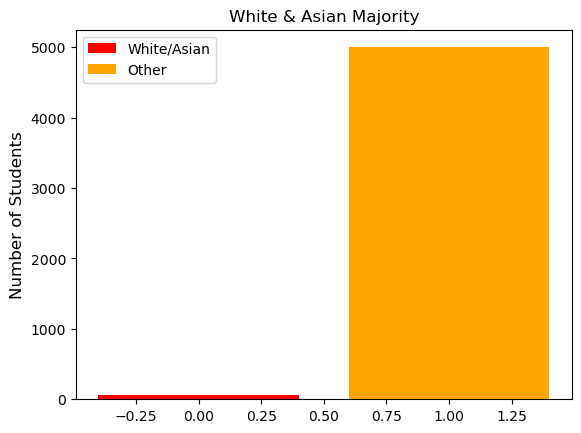

In [3]:
plt.bar(0, races.loc[[1,2], 'Students'].sum(), color='red', label = 'White/Asian')
plt.bar(1, races.loc[3:, 'Students'].sum(), color='orange', label='Other')
plt.title('White & Asian Majority')
plt.ylabel('Number of Students', size = 12)
plt.legend()
plt.show()

Looking at the overall numbers, the school isn't very diverse but this isn't new. The school previously attempted to be more diverse in the 90s but was sued for ["not permitting any racial/ethnic group to constitute more than 45 percent (40 percent at any "alternative school") of the school's total enrollment."<sup>(3)](https://law.justia.com/cases/federal/district-courts/FSupp/965/1316/2138871/)
    
Since COVID affected most if not all students' test scores, Lowell used this opportunity to once again try its hand at increasing diversity by implementing a lottery admission process.

# 2. Looking at Lottery vs Merit Admissions

Source for data below:
https://go.boarddocs.com/ca/sfusd/Board.nsf/files/CFERTE6F285A/%24file/Lowell_Extend%20for%202023-24_Board%20%5B6.16.22%5D-1.pdf

In [4]:
# Lottery year numbers are average of 2021-22 and 2022-23 school year
# Non-lottery year numbers are estimates based on percentages from the 2019-20, 2020-21 school years
data = {'Race_Subgroup': ['Chinese', 'Hispanic or Latinx',
                'White', 'Two or More Races', 'Filipino',
                                  'Black or African American'],
                'Total_Apps': [810, 627, 483, 392, 121, 102],
                '%Change': [43, 113, 53, 86, 33, 92],
                '%Accepted': [43.6, 21.6, 15.7, 8.1, 4.6, 4.0],
                '%SFUSD': [35.0, 32.7, 11.4, 5.3, 4.0, 7.5],
                '%Lowell_Total_Enrolled': [48.5, 14.1, 17.7, 7.5, 5.4, 2.0]
                }
apps = pd.DataFrame.from_dict(data)
# Feature Engineering
apps['Merit_Apps'] = round(apps['Total_Apps']/(1+(apps['%Change'])/100))
apps['Num_Accepted'] = round(649*(apps['%Accepted']/100))
apps['Adt_Lotto_Apps'] = apps['Total_Apps']-apps['Merit_Apps'] # additional applications due to lottery
apps['Total_Students'] = round(2786 * (apps['%Lowell_Total_Enrolled']/100))
apps['Merit_Students'] = apps['Total_Students']-2*apps['Num_Accepted']
apps['Merit_Students/year'] = round(apps['Merit_Students']/2)
apps['%Accepted_Merit'] = apps['Merit_Students/year']/apps['Merit_Apps']*100
apps['%Accepted_Lotto'] = apps['Num_Accepted']/apps['Total_Apps']*100
apps

,Race_Subgroup,Total_Apps,%Change,%Accepted,%SFUSD,%Lowell_Total_Enrolled,Merit_Apps,Num_Accepted,Adt_Lotto_Apps,Total_Students,Merit_Students,Merit_Students/year,%Accepted_Merit,%Accepted_Lotto
0,Chinese,810,43,43.6,35.0,48.5,566.0,283.0,244.0,1351.0,785.0,392.0,69.257951,34.938272
1,Hispanic or Latinx,627,113,21.6,32.7,14.1,294.0,140.0,333.0,393.0,113.0,56.0,19.047619,22.328549
2,White,483,53,15.7,11.4,17.7,316.0,102.0,167.0,493.0,289.0,144.0,45.569620,21.118012
3,Two or More Races,392,86,8.1,5.3,7.5,211.0,53.0,181.0,209.0,103.0,52.0,24.644550,13.520408
4,Filipino,121,33,4.6,4.0,5.4,91.0,30.0,30.0,150.0,90.0,45.0,49.450549,24.793388
5,Black or African American,102,92,4.0,7.5,2.0,53.0,26.0,49.0,56.0,4.0,2.0,3.773585,25.490196


### EDA

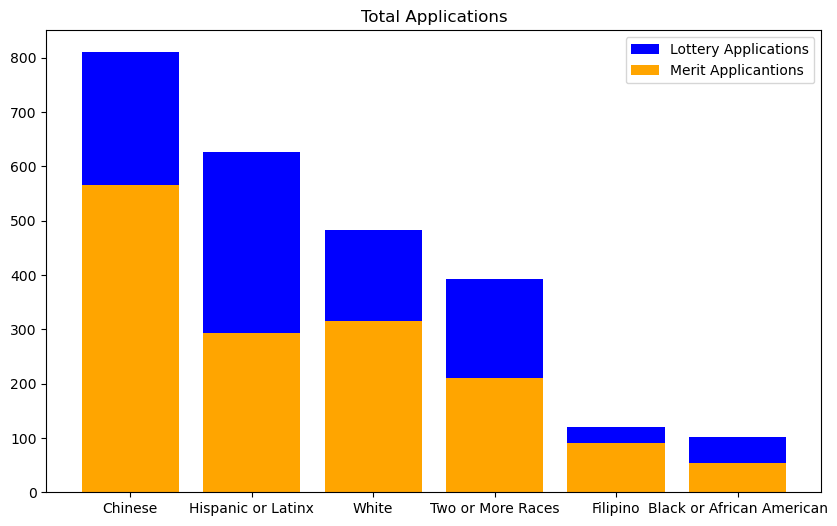

In [5]:
plt.figure(figsize=(10,6))
plt.bar(apps['Race_Subgroup'], apps['Total_Apps'], label = 'Lottery Applications', color='Blue')
plt.bar(apps['Race_Subgroup'], apps['Merit_Apps'], label = 'Merit Applicantions', color='Orange')
plt.xticks(rotation=0)
plt.title('Total Applications')
plt.legend()
plt.show()

The lottery admission process invited more than just the top quality students to apply. The results yielded double the amount of Latino and Black or African Ameritcan applicants. But what about those accepted?

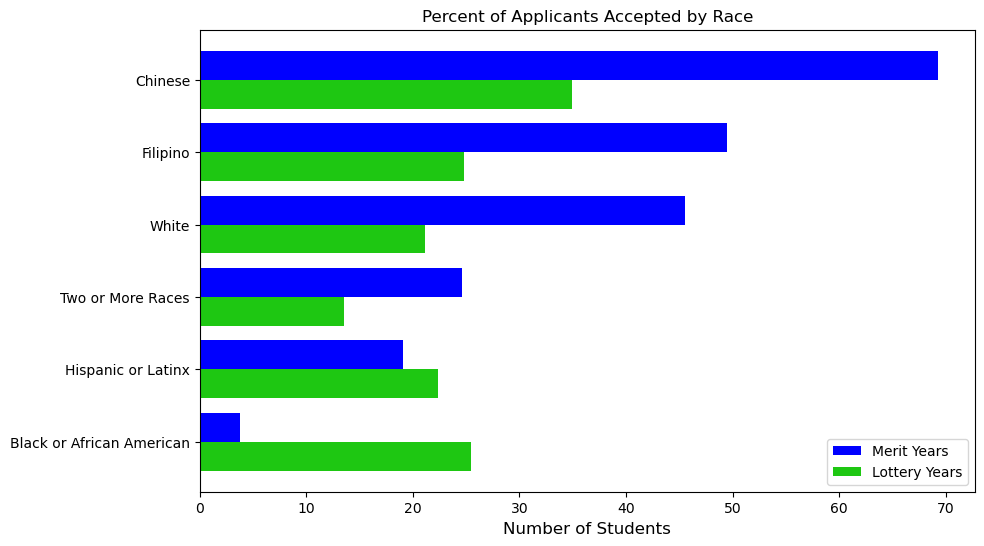

In [6]:
plt.figure(figsize=(10,6))
x = np.arange(len(apps['Race_Subgroup']))
w = 0.4
merit_sorted = apps.sort_values('%Accepted_Merit', ascending=True, ignore_index=True)
plt.barh(x+w/2, merit_sorted['%Accepted_Merit'],w, label = 'Merit Years', color='Blue')
plt.barh(x-w/2, merit_sorted['%Accepted_Lotto'],w, label = 'Lottery Years', color='#1ec712')
plt.yticks(ticks = x,labels=merit_sorted['Race_Subgroup'], rotation=0)
plt.title('Percent of Applicants Accepted by Race')
plt.xlabel('Number of Students', size=12)
plt.legend()
plt.show()

The percent of accepted applicants for each demographic is more balanced during the lottery years leading to vastly increased levels of diversity. Increasing diversity is not exactly the issue however. The real issue is increasing diversity in competitive environments while guaranteeing prosperity amongst all students.

Since I don't have the actual performance data, I estimated the average "scores" of each ethnic subgroup using their respective acceptance rate. Since Lowell was originally merit-based admission, I'm using the assumption that every candidate accepted had enough merit, and every candidate not accepted did not have enough merit. It's important to note it is possible for a student to have enough merit but be denied. However, since I do not have those numbers I will acknowledge and ignore that possibility. I used a standard deviation of 100 to keep the populations similar and used a "score" value of 1000 as the threshold for having enough merit to be accepted.

Source for below: https://thelowell.org/6456/features/who-gets-in-opening-up-the-lowell-admissions-controversy/

# 3. Quality vs Quantity
"It's unimportant who was
the first and who was the last.
The important thing is how many.
The rest is tokenism." - Bill Russell

In [7]:
import scipy.stats as stats


def find_optimal_mean(probability, threshold=1000, std_dev=100):
    z_score = stats.norm.ppf(1 - probability)
    mean = threshold - z_score * std_dev
    return mean

In [8]:
print('Average Scores:')
for i, prob in enumerate(apps['%Accepted_Merit']/100):
    opt_mean = round(find_optimal_mean(prob))
    print(opt_mean, apps.loc[i, 'Race_Subgroup'])
    apps.loc[i, 'Avg_score'] = opt_mean

Average Scores:
1050 Chinese
912 Hispanic or Latinx
989 White
931 Two or More Races
999 Filipino
822 Black or African American


In [9]:
def generate_dataframe():
    '''Generates a list of random students appropriately distributed by ethnicity'''
    # bin values to appripriately spread out number line
    bins = apps['Total_Apps'].cumsum().values
    bins = [0]+bins.tolist()

    # Generate random numbers
    random_students_merit = np.random.randint(0, int(bins[-1]), int(bins[-1]))

    # Bin generated numbers into ethnic group proportions
    assign = np.digitize(random_students_merit, bins)
    df = pd.DataFrame(assign, columns=['Race'])

    # Assign every student a random merit score based on their ethnicities acceptance rate
    df['Score'] = [np.random.normal(apps['Avg_score'][i-1], 100) for i in df['Race']]

    # Maps numbered values into string values of ethnicites
    mapping = dict(zip(range(1, 7), apps['Race_Subgroup']))
    df['Race'] = df['Race'].map(mapping)
    return df

In [10]:
np.random.seed(seed)
df = generate_dataframe()
df

,Race,Score
0,Hispanic or Latinx,1070.278725
1,Hispanic or Latinx,939.468107
2,Hispanic or Latinx,947.762426
3,Hispanic or Latinx,828.268092
4,White,939.250134
...,...,...
2530,Hispanic or Latinx,713.984954
2531,Two or More Races,880.827110
2532,Black or African American,814.846279
2533,Filipino,934.667560


**Max of 650 Applicants** ([2021-2022 admitted 649 students](https://www.usnews.com/education/best-high-schools/california/districts/san-francisco-unified-school-district/lowell-high-school-3259))

In [11]:
# Order by merit
merit = df.sort_values('Score', ascending=False, ignore_index=True)
# Select top applicants in order
merit = merit.iloc[:650]
# Look at ethnic distribution
merit['Race'].value_counts()

Chinese                      402
White                        130
Hispanic or Latinx            48
Two or More Races             42
Filipino                      26
Black or African American      2
Name: Race, dtype: int64

In [12]:
merit_grouped  = merit.groupby('Race').agg(['mean','median', 'count'])
merit_grouped.sort_values(('Score','count'), inplace=True, ascending=False)
merit_grouped

Score                   
                                  mean       median count
Race                                                     
Chinese                    1135.481666  1124.047279   402
White                      1108.100869  1098.371501   130
Hispanic or Latinx         1092.232079  1082.504875    48
Two or More Races          1095.262939  1081.736167    42
Filipino                   1124.496697  1113.846940    26
Black or African American  1077.132765  1077.132765     2

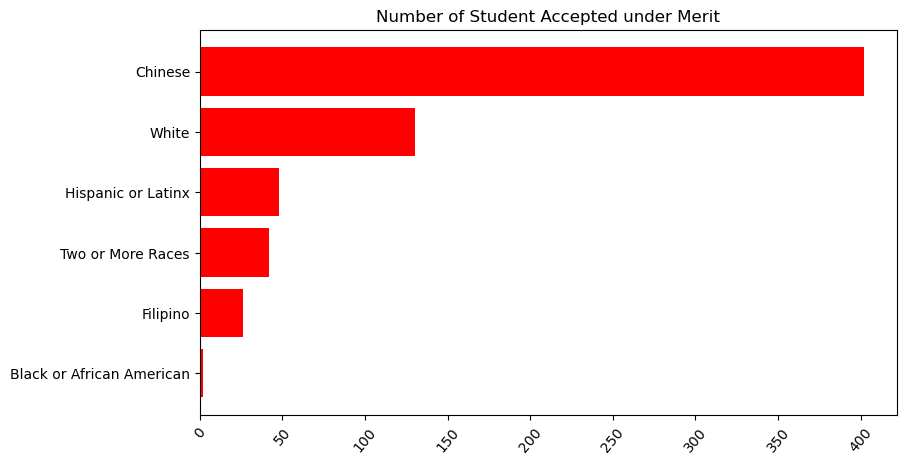

In [13]:
plt.figure(figsize=(9,5))
merit_grouped.sort_values(('Score','count'), inplace=True, ascending=True)
plt.barh(merit_grouped.index, merit_grouped['Score','count'],color='red')
plt.xticks(rotation=50)
plt.title('Number of Student Accepted under Merit')
plt.show()

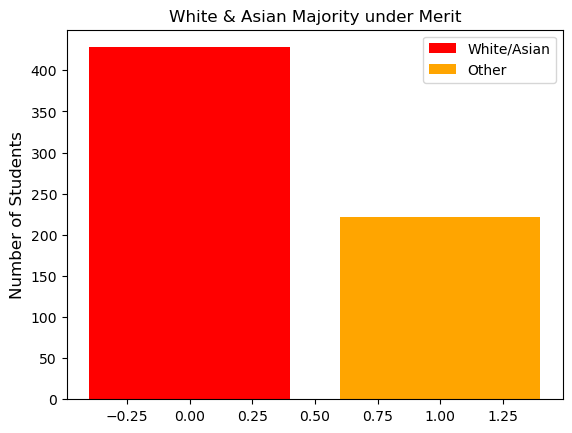

In [14]:
plt.bar(0, merit_grouped['Score','count'].iloc[[1,5]].sum(), color='red', label = 'White/Asian')
plt.bar(1, merit_grouped['Score','count'].iloc[[0,2,3,4]].sum(), color='orange', label='Other')
plt.title('White & Asian Majority under Merit')
plt.ylabel('Number of Students', size = 12)
plt.legend()
plt.show()

With only using merit as the admission system, we can see Chinese dominate the pool and Latinos and African Americans combine for only 50 accepted students which is 1/8th the number of Chinese students and only 1/13th of the entire incoming student population.

The lottery admission process is suppose to be more diverse since it gives every applicant an equal chance at getting accepted. Let's look at an example.

In [15]:
np.random.seed(seed)
lotto = df.copy()

# Randomly pick 650 students to be accepted
lotto.loc[np.random.permutation(len(lotto))[:650],'Accepted'] = 1

# Fill non-selected students NaN with 0
lotto['Accepted'].fillna(0, inplace=True) # Not technically necessary since we drop them later

# Drop all students not "accepted"
lotto = lotto[lotto['Accepted']==1].reset_index(drop=True)

# Create a column for if the accepted student would've got accepted under merit
lotto['Has_Merit'] = lotto['Score']>=1000
lotto

,Race,Score,Accepted,Has_Merit
0,Hispanic or Latinx,830.664535,1.0,False
1,Chinese,937.609853,1.0,False
2,White,1084.685688,1.0,True
3,Chinese,1144.428964,1.0,True
4,Two or More Races,845.065972,1.0,False
...,...,...,...,...
645,Chinese,1005.220245,1.0,True
646,Chinese,886.029088,1.0,False
647,Chinese,1055.341748,1.0,True
648,Black or African American,814.846279,1.0,False


In [16]:
lotto_grouped = lotto.groupby('Race').agg({'Score':['mean','median', 'count'], 'Has_Merit':'sum'})
lotto_grouped.sort_values(('Score','count'), ascending=False, inplace=True)
lotto_grouped

Score                    Has_Merit
                                  mean       median count       sum
Race                                                               
Chinese                    1046.959315  1055.341748   211       148
Hispanic or Latinx          903.737118   900.594083   155        23
White                       976.325444   976.324140   128        54
Two or More Races           939.118281   942.003309   105        31
Filipino                   1026.224291  1024.569380    30        19
Black or African American   808.957579   792.928926    21         1

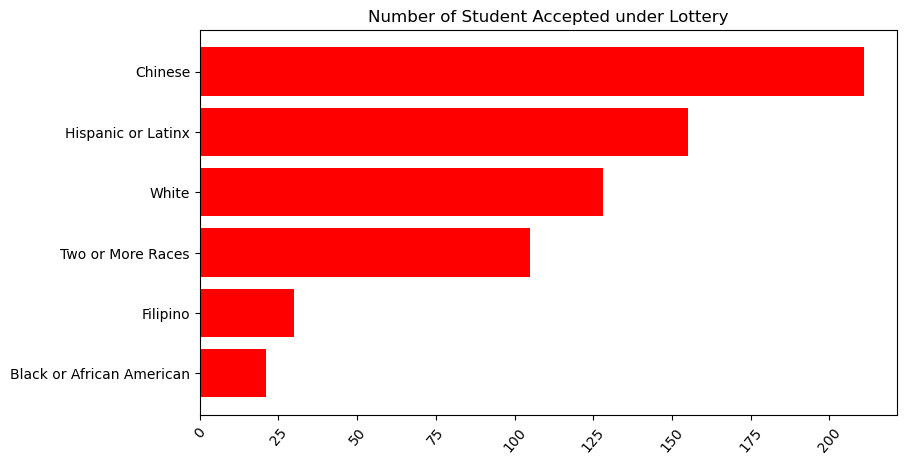

In [17]:
plt.figure(figsize=(9,5))
lotto_grouped.sort_values(('Score','count'), ascending=True, inplace=True)
plt.barh(lotto_grouped.index, lotto_grouped['Score','count'],color='red')
plt.xticks(rotation=50)
plt.title('Number of Student Accepted under Lottery')
plt.show()

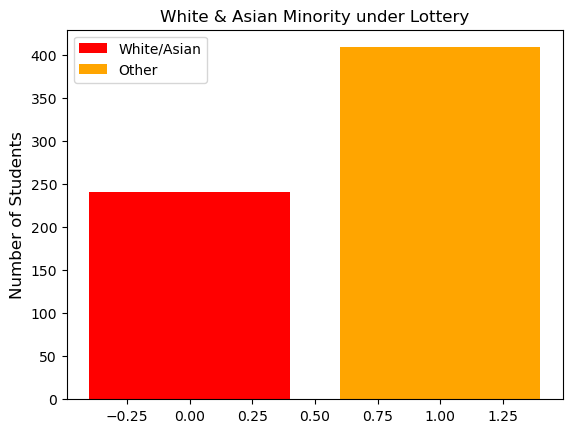

In [18]:
plt.bar(0, lotto_grouped['Score','count'].iloc[[1,5]].sum(), color='red', label = 'White/Asian')
plt.bar(1, lotto_grouped['Score','count'].iloc[[0,2,3,4]].sum(), color='orange', label='Other')
plt.title('White & Asian Minority under Lottery')
plt.ylabel('Number of Students', size = 12)
plt.legend()
plt.show()

We can see here under the lottery admission system, Latino and African American students would now make up 176 of the incoming class which would be a little more than a quarter of the population but the issue comes with their merit. Only one of the 21 African American students has the merit and one in every 7 Latino students have merit while Whites and Chinese have roughly half and 2/3rds resepectively. This doesn't mean anyone is doomed for failure per se, but it does mean they'll have a much harder time succeeding than their peers which may lead to reduced confidence and dropouts which can also have an residual impact on students similar to them. It is also important to note many Latino and African American students don't apply to Lowell since it historically doesn't accept many people that look like them. 

Let's add one more admission process, something similar to the now banned affirmative action where we take into consideration race and merit. In the real world this would be a much more holistic review but in this simulation space we only have race and merit.

A big question when it comes to affirmative action is to what extent to consider things other than merit. In my example I will use the same distribution as the lottery process since it in theory should give an equal opportunity to get accepted. 

In [19]:
lotto_numbers = lotto_grouped['Score', 'count']
lotto_numbers

Race
Black or African American     21
Filipino                      30
Two or More Races            105
White                        128
Hispanic or Latinx           155
Chinese                      211
Name: (Score, count), dtype: int64

In [20]:
lotto_numbers.index

Index(['Black or African American', 'Filipino', 'Two or More Races', 'White',
       'Hispanic or Latinx', 'Chinese'],
      dtype='object', name='Race')

In [21]:
# Sort by merit
action = df[df['Score']>=1000].sort_values('Score', ascending=False).reset_index(drop=True)
buffer = 19 # added to reach ~650 students accepted

# Get top x students from each race to fit distribution
filters = [action[action['Race']==x].iloc[:lotto_numbers[x]+buffer] for x in lotto_numbers.index]
action = pd.concat(filters, ignore_index=True)
action['Has_Merit'] = (action['Score']>1000)
action

,Race,Score,Has_Merit
0,Black or African American,1089.351097,True
1,Black or African American,1064.914432,True
2,Black or African American,1024.580709,True
3,Black or African American,1023.203413,True
4,Black or African American,1001.632393,True
...,...,...,...
644,Chinese,1115.635745,True
645,Chinese,1115.449249,True
646,Chinese,1115.410560,True
647,Chinese,1115.350195,True


In [22]:
action_grouped = action.groupby('Race').agg({'Score':['mean','median', 'count'], 'Has_Merit':'sum'})
action_grouped

Score                    Has_Merit
                                  mean       median count       sum
Race                                                               
Black or African American  1040.736409  1024.580709     5         5
Chinese                    1176.755684  1168.210895   230       230
Filipino                   1082.943520  1057.395499    49        49
Hispanic or Latinx         1052.289422  1043.429501   117       117
Two or More Races          1051.524965  1038.539345   101       101
White                      1101.077765  1094.874383   147       147

Here we can see that only did we have more diversity than merit only, but every student is completely capable of succeeding since they all qualify under the original merit definition. It is also important to note that this method only selected 592 students and an additional 19 students of each race (with merit) needed to be selected to hit the target goal.
### More EDA

In [23]:
df_grouped = df.copy()
df_grouped['Has_Merit'] = (df['Score']>=1000)+0
df_grouped = df_grouped.groupby('Race').agg({'Score':['mean','median', 'count'], 'Has_Merit':'sum'})
df_grouped

Score                    Has_Merit
                                  mean       median count       sum
Race                                                               
Black or African American   826.775674   829.176343    97         5
Chinese                    1050.696620  1052.537852   808       550
Filipino                   1002.503198  1010.068241   109        58
Hispanic or Latinx          909.623109   914.072019   644       117
Two or More Races           933.347524   932.017507   403       101
White                       987.502835   984.931896   474       216

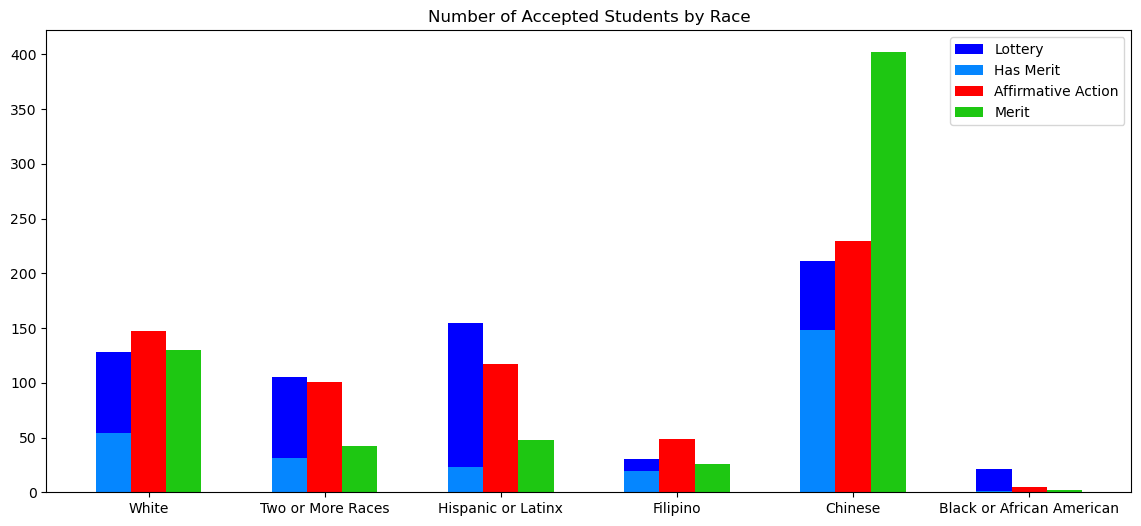

In [24]:
lotto_grouped.sort_index(ascending=False, inplace=True)
action_grouped.sort_index(ascending=False, inplace=True)
merit_grouped.sort_index(ascending=False, inplace=True)
x = np.arange(len(lotto_grouped['Score', 'count'].index))
w = 0.2
plt.figure(figsize=(14,6))
plt.title('Number of Accepted Students by Race')
plt.bar(x-w, lotto_grouped['Score', 'count'],w, label = 'Lottery', color='Blue')
plt.bar(x-w, lotto_grouped['Has_Merit', 'sum'],w, label = 'Has Merit', color='#0586ff')
plt.bar(x, action_grouped['Score', 'count'],w, label = 'Affirmative Action', color='red')
plt.bar(x+w, merit_grouped['Score', 'count'],w, label = 'Merit', color='#1ec712')
plt.xticks(x, labels=lotto_grouped['Score', 'count'].index, rotation=0)
plt.legend()
plt.show()

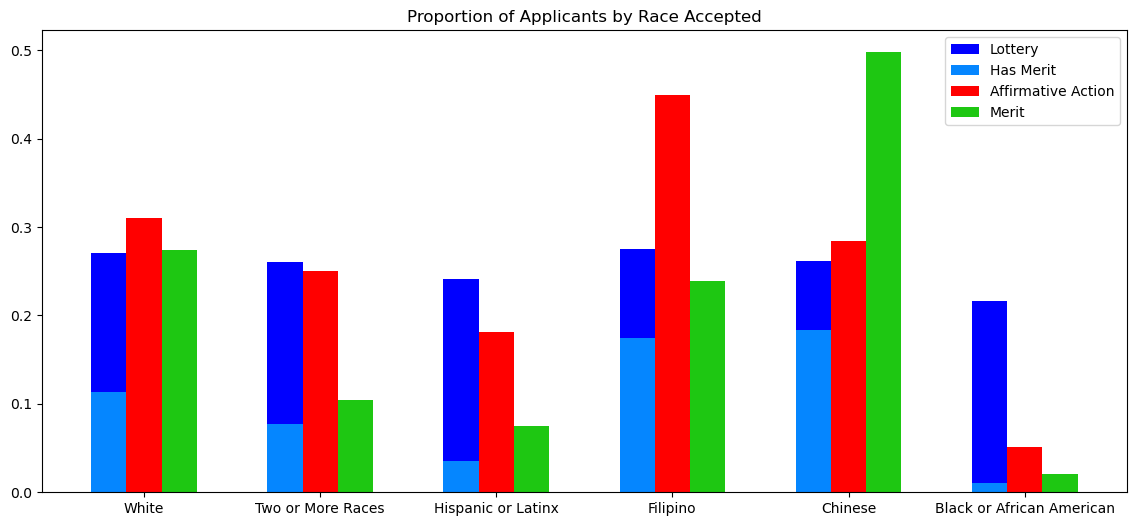

In [25]:
df_grouped.sort_index(ascending=False, inplace=True)

x = np.arange(len(lotto_grouped['Score', 'count'].index))
w = 0.20
plt.figure(figsize=(14,6))
plt.title('Proportion of Applicants by Race Accepted')

plt.bar(x-w, lotto_grouped['Score', 'count']/df_grouped['Score', 'count'],w, label = 'Lottery', color='Blue')
plt.bar(x-w, lotto_grouped['Has_Merit', 'sum']/df_grouped['Score', 'count'],w, label = 'Has Merit', color='#0586ff')
plt.bar(x, action_grouped['Score', 'count']/df_grouped['Score', 'count'],w, label = 'Affirmative Action', color='red')
plt.bar(x+w, merit_grouped['Score', 'count']/df_grouped['Score', 'count'],w, label = 'Merit', color='#1ec712')
plt.xticks(x, labels=lotto_grouped['Score', 'count'].index, rotation=0)
plt.legend()
plt.show()

# 4. Summary

Disregarding race from applications as demonstrated removes the ability to ensure a diverse and successful crop of accepted applicants. Minorities will either lack in numbers, or lack success compared to their peers with access to more support and resources.

Although race is being removed from consideration, holistic review as a whole is still possible which allows students with more difficult upbringings to be properly evaluated with context. In practice, this often doesn't solve the issue at hand due to stigmas, cultural connotations around trauma, and systematic racist. As a Chinese descendent myself, all of my family speaks about their lives and experiences that have once or recently caused them great pain. To quote arist J. Cole of African American descent "[There's all sorts of trauma from drama that children see, type of [things] that normally would call for therapy. But you know just how it go in our community, keep that [stuff] inside it don't matter how hard it be"<sup>(4)](https://genius.com/J-cole-friends-lyrics)

Although this is anecdotal evidence from a song, J. Cole speaks about how children in his community don't speak up about the traumas and difficulties they may face while growing up. With this in mind, taking a holistic review of each applicant only includes what the applicant is willing and able to reveal. Using the previous two pieces of anecdotal evidence, Chinese and White students may have an easier time presenting their hardships in their applications than African American students. There is also an argument to be made that living in America as an African American person is much harder than living as an Asian American and many children that experience systematic racist and microaggressions due to their darker complexion may think that's just how life goes.

Either way you slice it, disconsidering race predominantly disadvantages minority applicants by removing a large piece of their holistic review. It also prevents admission officers from understanding unspoken challenges students of color face on a regular basis. 
    
Although I don't agree in this ruling by the Supreme Court, if this motion truly lacked racist intent, I think banning legacy status from admissions is the only fair thing to do since that is affirmative action but for privileged rich kids which discriminates against **all** other applicants.
    
    

# <center>Works Cited</center>
(In order of appearance)

1. Camp, Emma. "A Top-Ranked High School Got Rid of Merit-Based Admissions. Then Students' Grades Tanked." reason, October 12, 2022, https://reason.com/2022/10/12/a-top-ranked-high-school-got-rid-of-merit-based-admissions-then-students-grades-tanked/

2. Cano, Ricardo, and Nenette Asimov. "New data shows shift at Lowell High School. More students given failing grades after admissions change." sfchronicle, May 25, 2022, https://www.sfchronicle.com/sf/article/lowell-high-admissions-17196603.php#:~:text=Of%20the%20620%20students%20in,figures%20obtained%20by%20The%20Chronicle

3. Ho by Ho v. San Francisco Unified School Dist., 965 F. Supp. 1316 (N.D. Cal. 1997). May 5, 1997, https://law.justia.com/cases/federal/district-courts/FSupp/965/1316/2138871/


4. J. Cole, "FRIENDS", KOD, 2018, https://genius.com/J-cole-friends-lyrics



